# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [13]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [16]:
# Definimos uma função para a temperatura mensal
def temp_mensal(arquivo):
    #Docstring
    """Função que gera lista de dados de tempo mensais e suas respectivas temperaturas mensais"""
    # Abre o arquivo
    arquivo = open(arquivo)
    # Cria listas vazias de datas e dados. 
    datas = []
    dados = []
    # Foi feito um loop para as linhas do arquivo.
    for linhas in arquivo:
        # Com o if foram definidas certas condiçoes para a quebra das linhas
        if linhas[0] != '%':
            coluna = linhas.split()
            # Foi estabelecida a condiçao de que as linhas não podiam estar vazias.
            if len(coluna) != 0:
                # Condição para ignorar os NaN da coluna 2.
                if coluna[2] != 'NaN':
                    # Transformou os dados da coluna 0, 1 e 2 em numeros reais.
                    ano = float(coluna[0])
                    mes = float(coluna[1])
                    dadostemp = float(coluna[2])
                    # Soma a temperatura as suas variaçoes na coluna 2.
                    dadosmes = dadostemp + 24.01
                    # Soma o ano aos seus decimais que representam os meses.
                    anomensal = ano + (mes/12)
                    # Adiciona os dados e o anos nas listas vazias.
                    datas.append(anomensal)
                    dados.append(dadosmes)
    # Fecha o arquivo                
    arquivo.close()
    # Retorna as listas
    return datas, dados

In [17]:
# Usando a função criada temp_mensal, a entrada é o nome do arquivo e retorna duas listas, x1 com as datas e y1 com as temperaturas.
x1,y1 = temp_mensal('data/23.31S-42.82W-TAVG-Trend.txt')

In [18]:
# Definimos uma função que calcula a média movel anual.
def mmanual(arquivo):
    # Docstring
    """Função que gera lista de dados de tempo mensais e suas respectivas temperaturas médias móveis anuais"""
    # Abre o arquivo
    arquivo = open(arquivo)
    # Cria listas vazias
    datas = []
    dados = []
    # Faz um loop dentro do arquivo.
    for linhas in arquivo:
        # Condiciona que as linhas que o loop vai pegar sejam as que não começam com o simbolo %.
        if linhas[0] != '%':
            # Quebra as linhas.
            coluna = linhas.split()
            # Condiciona que as linhas do loop sejam as que não estão vazias.
            if len(coluna) != 0:
                # Ignora os dados com NaN da coluna 4
                if coluna[4] != 'NaN':
                    # Transforma as colunas 0, 1 e 4 em numero real
                    ano = float(coluna[0])
                    mes = float(coluna[1])
                    dadostemp = float(coluna[4])
                    # Somas os desvios a media dada 
                    dadosmes = dadostemp + 24.01
                    # Calcula os anos em décimos de mês.
                    anomensal = ano + (mes/12)
                    # Adiciona os valores as listas.
                    datas.append(anomensal)
                    dados.append(dadosmes)
                    
    # Fecha o arquivo                
    arquivo.close()
    # Retorna as datas e os dados
    return datas, dados


In [19]:
# Insere o nome do arquivo na função criada e define duas variaveis, datas e dados geradas a partir da função.
x2,y2 = mmanual('data/23.31S-42.82W-TAVG-Trend.txt')

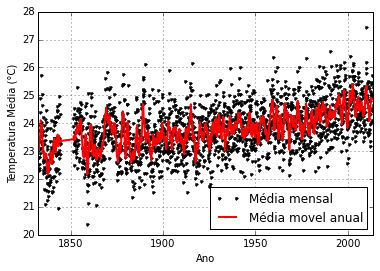

In [20]:
plt.figure()
plt.plot(x1, y1, '.k', label = 'Média mensal')
plt.plot(x2, y2, '-r', linewidth = 2, label = 'Média movel anual')
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.xlabel("Ano")
plt.xlim(min(x1), max(x1))
plt.ylabel("Temperatura Média (°C)")
plt.grid(b=None, which='major', axis='both')
plt.legend(loc='lower right', fontsize='large')

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

In [21]:
# Definimos uma fução que calcula a temperatura media anual.
def tma(datas, dados):
    # Criamos listas vazias.
    lista_anos_media = []
    lista_temp_media = []
    # Variavel N criada.
    N = 12
    # Foi feito um loop que percorre todas as linhas do arquivo.
    for i in range(0, len(datas), 1):
        # Foi estabelecida a condição de que somente os anos com doze meses fossem usados.
        if i + (N - 1) < len(datas) and math.floor(datas[i]) == math.floor(datas[i + (N - 1)]): 
            # Foi calculada a media das temperaturas, utilizando a função somatorio.
            media_temp = sum(dados[i:i + N ])/N
            # Foram adicionadas os valores gerados as listas vazias.
            lista_temp_media.append(media_temp)
            lista_anos_media.append(math.floor((datas[i])))       
            
            
    # Retorna os valores das listas
    return lista_anos_media, lista_temp_media

In [22]:
# Usamos a função criada para gerar as médias.
[t1, t2] = tma(x1, y1)
print(t1, t2)



[1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 200

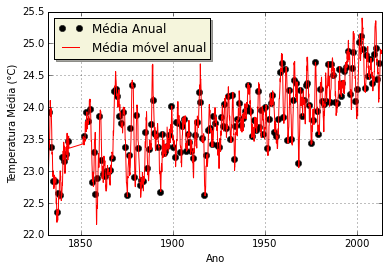

In [23]:
plt.figure()
plt.plot(t1, t2, 'ok', label = 'Média Anual')
plt.plot(x2, y2, '-r', linewidth = 1, label = 'Média móvel anual')
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
# título do eixo x.
plt.xlabel("Ano")
plt.xlim(min(x1), max(x1))
# título do eixo y.
plt.ylabel("Temperatura Média (°C)")
plt.grid(b=None, which='major', axis='both')
plt.legend(loc='lower right', fontsize='large') #local onde a legenda é inserida na tela

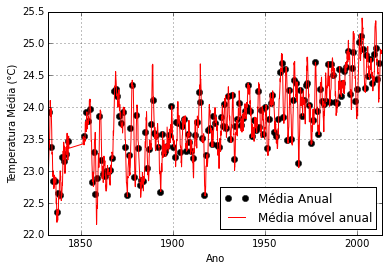

In [25]:
# gráfico
plt.figure()
plt.plot(t1, t2, 'ok', label = 'Média Anual')
plt.plot(x2, y2, '-r', linewidth = 1, label = 'Média móvel anual')
legend = plt.legend(loc='upper left', shadow=True, fontsize='large')
# título do eixo x.
plt.xlabel("Ano")
plt.xlim(min(x1), max(x1))
# título do eixo y.
plt.ylabel("Temperatura Média (°C)")
plt.grid(b=None, which='major', axis='both')
plt.legend(loc='lower right', fontsize='large') #local onde a legenda é inserida na tela

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).